In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import joblib

In [2]:
df = pd.read_csv("../../Data/Kaggle/StoreSales/processed_train_v2.csv")

In [3]:
df.index = pd.to_datetime(df['date'])

In [4]:
df = df.drop(['id','date'], axis=1)

In [5]:
df.head()

,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
date,,,,,,,,,,,,,,
2013-01-01,1,0,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,1,1,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,1,2,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,1,3,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,1,4,0.0,0,3,93.14,18,12,3,13,2,1,1,2013


In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [7]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
X, y = df_to_X_y(df)

In [9]:
X.shape, y.shape

((3000881, 7, 14), (3000881,))

In [10]:
X_train, y_train = X[:2400710], y[:2400710]
X_val, y_val = X[2400710:2700799], y[2400710:2700799]
X_test, y_test = X[2700799:], y[2700799:]

In [11]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2400710, 7, 14),
 (2400710,),
 (300089, 7, 14),
 (300089,),
 (300082, 7, 14),
 (300082,))

In [12]:
model = Sequential()
model.add(InputLayer((7, 14)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'relu'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                20224     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 20753 (81.07 KB)
Trainable params: 20753 (81.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [15]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
75023/75023 [==============================] - 131s 2ms/step - loss: 36.3652 - root_mean_squared_error: 6.0304 - val_loss: 5.7961 - val_root_mean_squared_error: 2.4075
Epoch 2/10
75023/75023 [==============================] - 112s 1ms/step - loss: 5.8307 - root_mean_squared_error: 2.4147 - val_loss: 5.5787 - val_root_mean_squared_error: 2.3619
Epoch 3/10
75023/75023 [==============================] - 112s 1ms/step - loss: 5.5053 - root_mean_squared_error: 2.3463 - val_loss: 5.1024 - val_root_mean_squared_error: 2.2589
Epoch 4/10
75023/75023 [==============================] - 116s 2ms/step - loss: 5.2507 - root_mean_squared_error: 2.2914 - val_loss: 4.8673 - val_root_mean_squared_error: 2.2062
Epoch 5/10
75023/75023 [==============================] - 117s 2ms/step - loss: 5.0454 - root_mean_squared_error: 2.2462 - val_loss: 4.5763 - val_root_mean_squared_error: 2.1392
Epoch 6/10
75023/75023 [==============================] - 119s 2ms/step - loss: 4.8831 - root_mean_squared_er

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return

75023/75023 [==============================] - 36s 479us/step


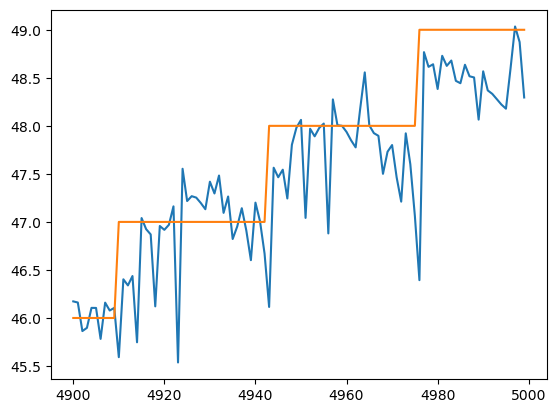

In [18]:
plot_predictions(model, X_train, y_train, 4900, 5000)

9378/9378 [==============================] - 4s 474us/step


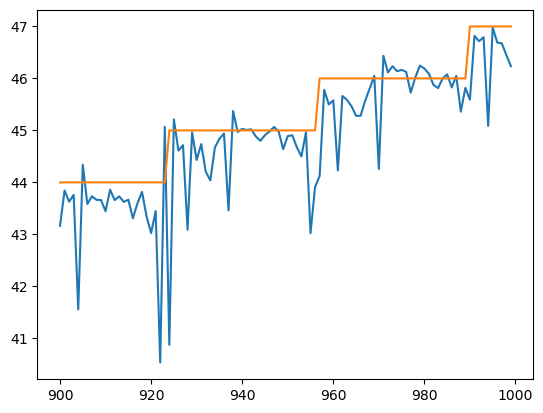

In [19]:
plot_predictions(model, X_val, y_val, 900, 1000)

9378/9378 [==============================] - 4s 470us/step


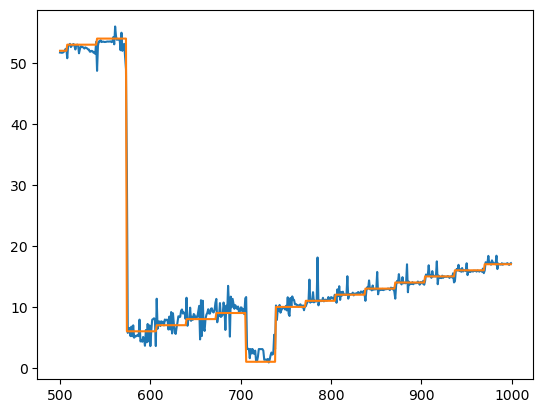

In [21]:
plot_predictions(model, X_test, y_test, 500, 1000)